# BÀI THỰC HÀNH: PERCEPTRON

---

**Thông tin sinh viên:**
- **Họ và tên:** Bùi Quang Chiến
- **MSSV:** 23001837
- **Lớp:** K68 - Khoa học máy tính
- **Trường:** Đại học Khoa học Tự nhiên - ĐHQGHN

---

## 1. IMPORT THƯ VIỆN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 2. PHẦN 1: PERCEPTRON VỚI SONAR DATASET

### 2.1. Giới thiệu về dữ liệu Sonar

Bộ dữ liệu Sonar chứa các mẫu tín hiệu sonar phản hồi từ các vật thể kim loại và đá. Mỗi mẫu có 60 đặc trưng số thực biểu diễn năng lượng trong các dải tần số khác nhau.

- **Số mẫu:** 208
- **Số đặc trưng:** 60 (năng lượng tín hiệu trong các dải tần)
- **Nhãn:** R (Rock - Đá) và M (Mine - Mìn kim loại)

### 2.2. Đọc và khám phá dữ liệu

In [2]:
# Đọc dữ liệu Sonar
sonar_data = pd.read_csv('sonar.all-data.csv', header=None)

# Đặt tên cột
feature_names = [f'Feature_{i}' for i in range(60)]
sonar_data.columns = feature_names + ['Class']

print("="*80)
print("THÔNG TIN DỮ LIỆU SONAR")
print("="*80)
print(f"Kích thước dữ liệu: {sonar_data.shape}")
print(f"\nSố lượng mẫu theo từng lớp:")
print(sonar_data['Class'].value_counts())
print(f"\n5 mẫu đầu tiên:")
display(sonar_data.head())
print(f"\nThống kê mô tả:")
display(sonar_data.describe())

THÔNG TIN DỮ LIỆU SONAR
Kích thước dữ liệu: (208, 61)

Số lượng mẫu theo từng lớp:
Class
M    111
R     97
Name: count, dtype: int64

5 mẫu đầu tiên:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R



Thống kê mô tả:


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [3]:
# Kiểm tra giá trị thiếu
print("\nKiểm tra giá trị thiếu:")
print(f"Tổng số giá trị thiếu: {sonar_data.isnull().sum().sum()}")

# Kiểm tra kiểu dữ liệu
print("\nKiểu dữ liệu các cột:")
print(sonar_data.dtypes.value_counts())


Kiểm tra giá trị thiếu:
Tổng số giá trị thiếu: 0

Kiểu dữ liệu các cột:
float64    60
object      1
Name: count, dtype: int64


### 2.3. Trực quan hóa dữ liệu

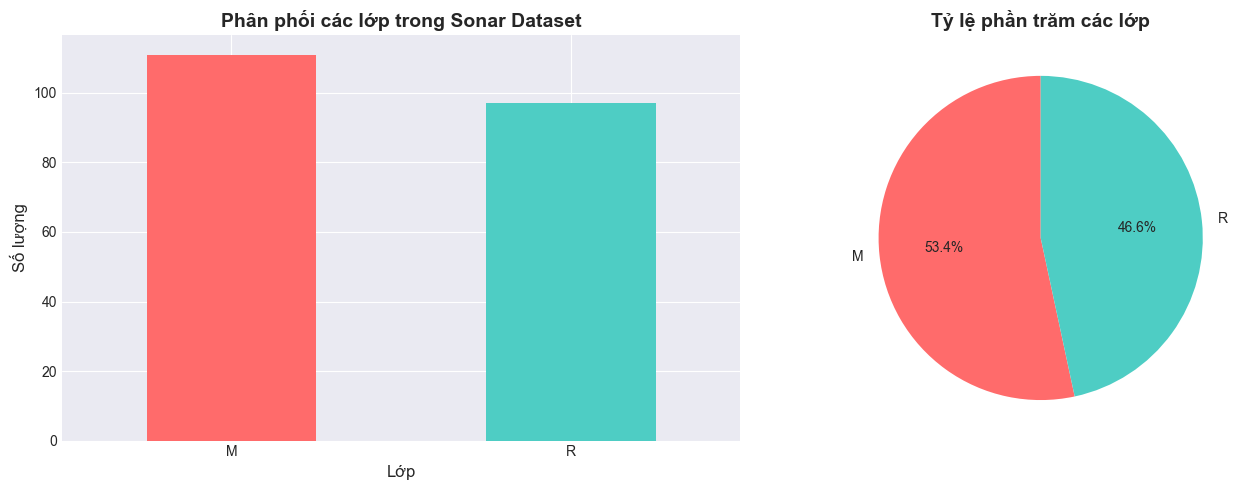

In [4]:
# Biểu đồ phân phối lớp
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột
sonar_data['Class'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Phân phối các lớp trong Sonar Dataset', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lớp', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].tick_params(rotation=0)

# Biểu đồ tròn
sonar_data['Class'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                         colors=['#FF6B6B', '#4ECDC4'], startangle=90)
axes[1].set_title('Tỷ lệ phần trăm các lớp', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

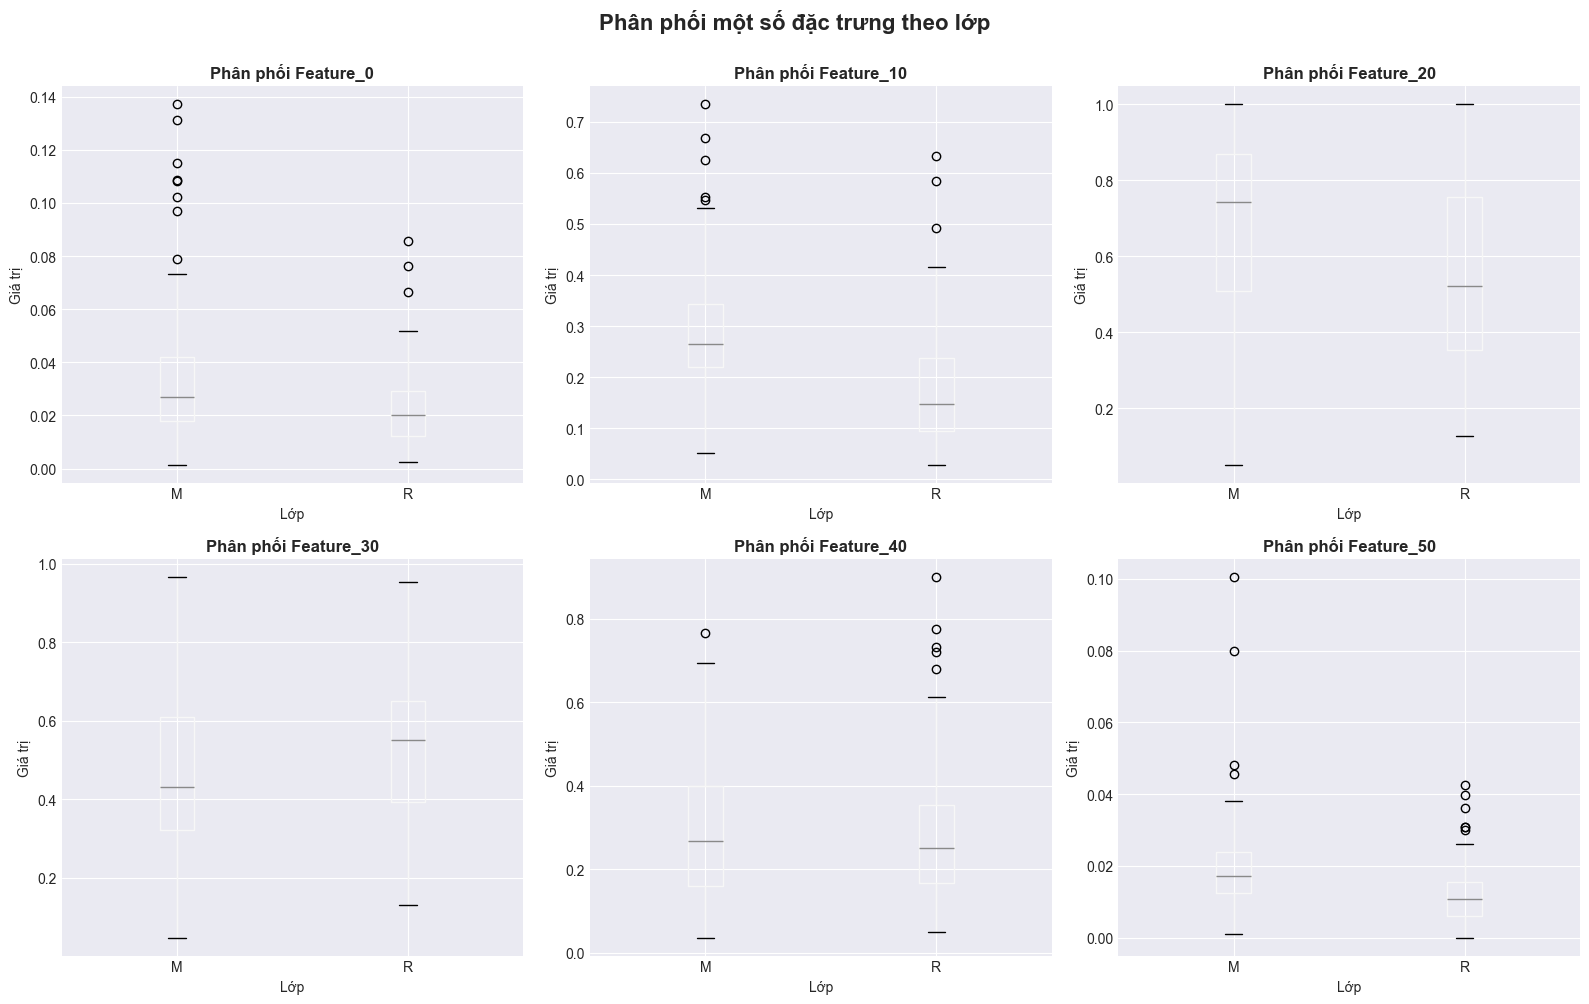

In [5]:
# Trực quan hóa một số đặc trưng quan trọng
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Chọn một số đặc trưng để visualize
features_to_plot = [0, 10, 20, 30, 40, 50]

for idx, feature_idx in enumerate(features_to_plot):
    feature_name = f'Feature_{feature_idx}'
    
    # Vẽ boxplot cho từng lớp
    sonar_data.boxplot(column=feature_name, by='Class', ax=axes[idx])
    axes[idx].set_title(f'Phân phối {feature_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Lớp', fontsize=10)
    axes[idx].set_ylabel('Giá trị', fontsize=10)
    plt.sca(axes[idx])
    plt.xticks(rotation=0)

plt.suptitle('Phân phối một số đặc trưng theo lớp', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

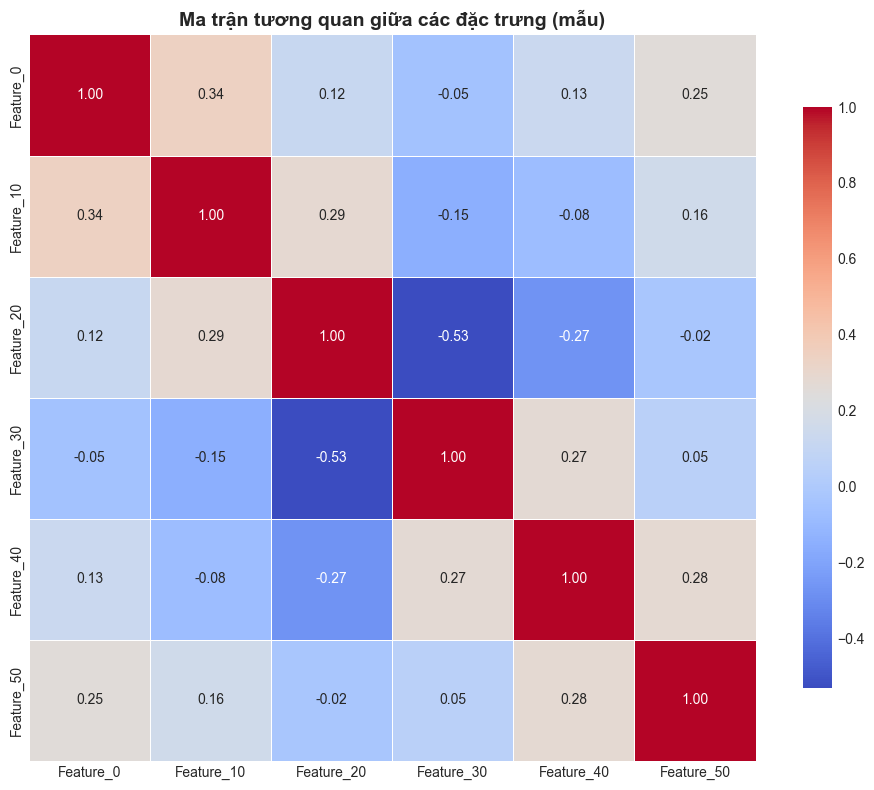

In [6]:
# Ma trận tương quan cho một số đặc trưng
features_subset = [f'Feature_{i}' for i in range(0, 60, 10)]
correlation_matrix = sonar_data[features_subset].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan giữa các đặc trưng (mẫu)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.4. Tiền xử lý dữ liệu

In [7]:
# Tách đặc trưng và nhãn
X_sonar = sonar_data.iloc[:, :-1].values
y_sonar = sonar_data.iloc[:, -1].values

# Mã hóa nhãn: R -> 0, M -> 1
label_encoder = LabelEncoder()
y_sonar_encoded = label_encoder.fit_transform(y_sonar)

print("Mã hóa nhãn:")
print(f"R (Rock - Đá) -> {label_encoder.transform(['R'])[0]}")
print(f"M (Mine - Mìn) -> {label_encoder.transform(['M'])[0] if 'M' in label_encoder.classes_ else 'N/A'}")

# Chia dữ liệu thành tập train và test (80-20)
X_train_sonar, X_test_sonar, y_train_sonar, y_test_sonar = train_test_split(
    X_sonar, y_sonar_encoded, test_size=0.2, random_state=42, stratify=y_sonar_encoded
)

print(f"\nKích thước tập train: {X_train_sonar.shape}")
print(f"Kích thước tập test: {X_test_sonar.shape}")

# Chuẩn hóa dữ liệu
scaler_sonar = StandardScaler()
X_train_sonar_scaled = scaler_sonar.fit_transform(X_train_sonar)
X_test_sonar_scaled = scaler_sonar.transform(X_test_sonar)

print("\nĐã hoàn thành chuẩn hóa dữ liệu (StandardScaler)")
print(f"Mean sau chuẩn hóa: {X_train_sonar_scaled.mean():.6f}")
print(f"Std sau chuẩn hóa: {X_train_sonar_scaled.std():.6f}")

Mã hóa nhãn:
R (Rock - Đá) -> 1
M (Mine - Mìn) -> 0

Kích thước tập train: (166, 60)
Kích thước tập test: (42, 60)

Đã hoàn thành chuẩn hóa dữ liệu (StandardScaler)
Mean sau chuẩn hóa: 0.000000
Std sau chuẩn hóa: 1.000000


### 2.5. Xây dựng và huấn luyện mô hình Perceptron

In [8]:
# Khởi tạo và huấn luyện Perceptron
perceptron_sonar = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

print("Đang huấn luyện mô hình Perceptron trên Sonar Dataset...")
perceptron_sonar.fit(X_train_sonar_scaled, y_train_sonar)
print("Hoàn thành huấn luyện!\n")

# Thông tin về mô hình
print("Thông tin mô hình:")
print(f"Số lần lặp: {perceptron_sonar.n_iter_}")
print(f"Số lượng trọng số: {len(perceptron_sonar.coef_[0])}")
print(f"Bias (hệ số chặn): {perceptron_sonar.intercept_[0]:.4f}")

Đang huấn luyện mô hình Perceptron trên Sonar Dataset...
Hoàn thành huấn luyện!

Thông tin mô hình:
Số lần lặp: 6
Số lượng trọng số: 60
Bias (hệ số chặn): -0.6000


### 2.6. Đánh giá mô hình

In [9]:
# Dự đoán trên tập train và test
y_train_pred_sonar = perceptron_sonar.predict(X_train_sonar_scaled)
y_test_pred_sonar = perceptron_sonar.predict(X_test_sonar_scaled)

# Tính accuracy
train_accuracy_sonar = accuracy_score(y_train_sonar, y_train_pred_sonar)
test_accuracy_sonar = accuracy_score(y_test_sonar, y_test_pred_sonar)

print("="*80)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH PERCEPTRON - SONAR DATASET")
print("="*80)
print(f"Độ chính xác trên tập Train: {train_accuracy_sonar*100:.2f}%")
print(f"Độ chính xác trên tập Test:  {test_accuracy_sonar*100:.2f}%")
print("="*80)

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH PERCEPTRON - SONAR DATASET
Độ chính xác trên tập Train: 84.94%
Độ chính xác trên tập Test:  83.33%


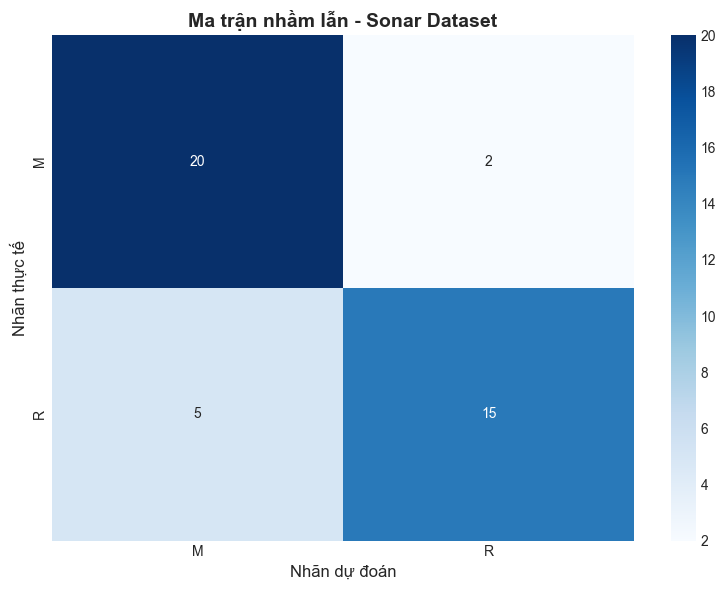


Ma trận nhầm lẫn:
[[20  2]
 [ 5 15]]


In [10]:
# Ma trận nhầm lẫn
cm_sonar = confusion_matrix(y_test_sonar, y_test_pred_sonar)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_sonar, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Ma trận nhầm lẫn - Sonar Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.tight_layout()
plt.show()

print("\nMa trận nhầm lẫn:")
print(cm_sonar)

In [11]:
# Báo cáo phân loại chi tiết
print("\nBÁO CÁO PHÂN LOẠI CHI TIẾT")
print("="*80)
print(classification_report(y_test_sonar, y_test_pred_sonar, 
                          target_names=label_encoder.classes_))


BÁO CÁO PHÂN LOẠI CHI TIẾT
              precision    recall  f1-score   support

           M       0.80      0.91      0.85        22
           R       0.88      0.75      0.81        20

    accuracy                           0.83        42
   macro avg       0.84      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42



### 2.7. Trực quan hóa trọng số của Perceptron

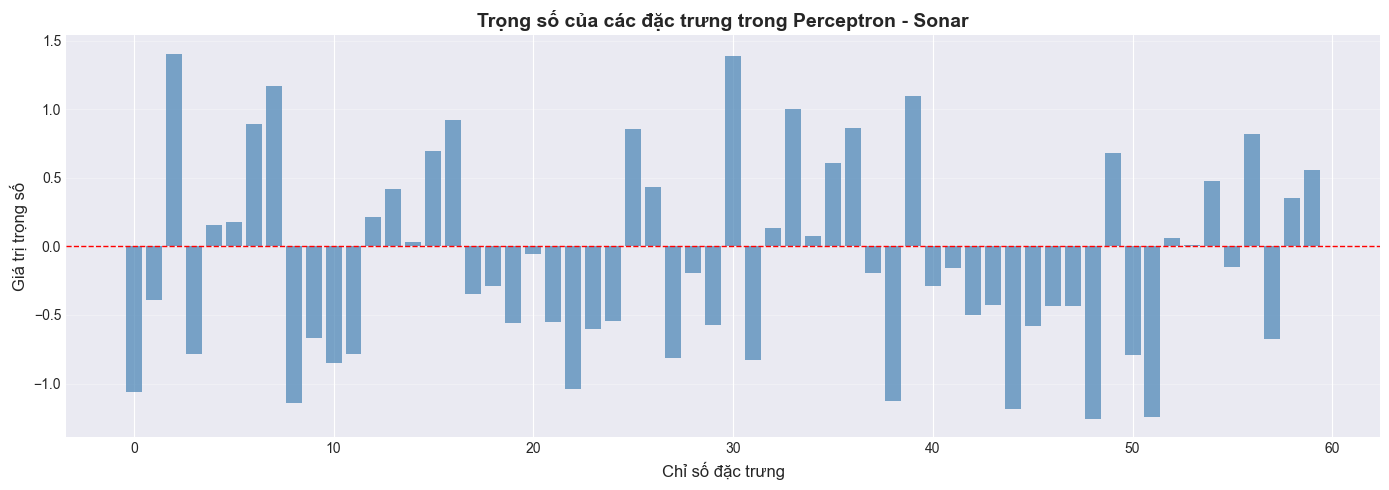


Top 10 đặc trưng quan trọng nhất:


,Feature,Weight,Abs_Weight
2,Feature_2,1.405302,1.405302
30,Feature_30,1.385050,1.385050
48,Feature_48,-1.259446,1.259446
51,Feature_51,-1.247301,1.247301
44,Feature_44,-1.185054,1.185054
7,Feature_7,1.167817,1.167817
8,Feature_8,-1.144316,1.144316
38,Feature_38,-1.124799,1.124799
39,Feature_39,1.098697,1.098697
0,Feature_0,-1.058533,1.058533


In [12]:
# Trực quan hóa trọng số
weights = perceptron_sonar.coef_[0]

plt.figure(figsize=(14, 5))
plt.bar(range(len(weights)), weights, color='steelblue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Trọng số của các đặc trưng trong Perceptron - Sonar', fontsize=14, fontweight='bold')
plt.xlabel('Chỉ số đặc trưng', fontsize=12)
plt.ylabel('Giá trị trọng số', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Top 10 đặc trưng quan trọng nhất
feature_importance = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(60)],
    'Weight': weights,
    'Abs_Weight': np.abs(weights)
}).sort_values('Abs_Weight', ascending=False)

print("\nTop 10 đặc trưng quan trọng nhất:")
display(feature_importance.head(10))

## 3. PHẦN 2: PERCEPTRON VỚI ANALYSIS PORTFOLIO DATASET

### 3.1. Giới thiệu về dữ liệu

Bộ dữ liệu Analysis Portfolio chứa thông tin về hành vi mua sắm của khách hàng, bao gồm:
- Thông tin cá nhân (Giới tính, Tuổi)
- Thông tin mua sắm (Giỏ hàng, Loại cửa hàng, Các loại sản phẩm)

### 3.2. Đọc và khám phá dữ liệu

In [13]:
# Đọc dữ liệu
portfolio_data = pd.read_csv('Analysis-Portfolio-Task-Data.csv')

print("="*80)
print("THÔNG TIN DỮ LIỆU PORTFOLIO")
print("="*80)
print(f"Kích thước dữ liệu: {portfolio_data.shape}")
print(f"\nTên các cột:")
print(portfolio_data.columns.tolist())
print(f"\n5 mẫu đầu tiên:")
display(portfolio_data.head())
print(f"\nThông tin chi tiết:")
print(portfolio_data.info())
print(f"\nThống kê mô tả:")
display(portfolio_data.describe())

THÔNG TIN DỮ LIỆU PORTFOLIO
Kích thước dữ liệu: (75, 8)

Tên các cột:
['CustomerID', 'Shopping Basket', 'Gender', 'Age', 'Store Type', 'Value Products', 'Brand Products', 'Top Fresco Products']

5 mẫu đầu tiên:


,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,20358063,48.81,Male,26,Convenient Stores,8,2,1
1,24635139,33.44,Female,33,Superstore,6,5,1
2,27584479,131.57,Male,56,Online,35,8,12
3,28008212,20.02,Male,27,Convenient Stores,0,1,1
4,29130973,95.54,Female,55,Online,38,18,20



Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           75 non-null     int64  
 1   Shopping Basket      75 non-null     float64
 2   Gender               75 non-null     object 
 3   Age                  75 non-null     int64  
 4   Store Type           75 non-null     object 
 5   Value Products       75 non-null     int64  
 6   Brand Products       75 non-null     int64  
 7   Top Fresco Products  75 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ KB
None

Thống kê mô tả:


,CustomerID,Shopping Basket,Age,Value Products,Brand Products,Top Fresco Products
count,7.500000e+01,75.000000,75.000000,75.000000,75.00000,75.000000
mean,5.528687e+07,60.960667,38.640000,15.813333,8.60000,6.893333
std,1.990541e+07,39.770647,13.808184,12.213963,6.17974,5.326054
min,2.035806e+07,3.400000,19.000000,0.000000,0.00000,0.000000
25%,3.654195e+07,25.595000,25.500000,7.000000,3.00000,3.000000
50%,5.230947e+07,58.060000,38.000000,13.000000,8.00000,6.000000
75%,7.258872e+07,85.160000,48.500000,20.000000,13.00000,10.000000
max,9.966645e+07,159.470000,68.000000,48.000000,23.00000,20.000000


In [14]:
# Kiểm tra giá trị thiếu
print("\nKiểm tra giá trị thiếu:")
print(portfolio_data.isnull().sum())

# Phân phối của các biến phân loại
print("\nPhân phối Giới tính:")
print(portfolio_data['Gender'].value_counts())
print("\nPhân phối Loại cửa hàng:")
print(portfolio_data['Store Type'].value_counts())


Kiểm tra giá trị thiếu:
CustomerID             0
Shopping Basket        0
Gender                 0
Age                    0
Store Type             0
Value Products         0
Brand Products         0
Top Fresco Products    0
dtype: int64

Phân phối Giới tính:
Gender
Male      39
Female    36
Name: count, dtype: int64

Phân phối Loại cửa hàng:
Store Type
Superstore           34
Online               21
Convenient Stores    20
Name: count, dtype: int64


### 3.3. Trực quan hóa dữ liệu

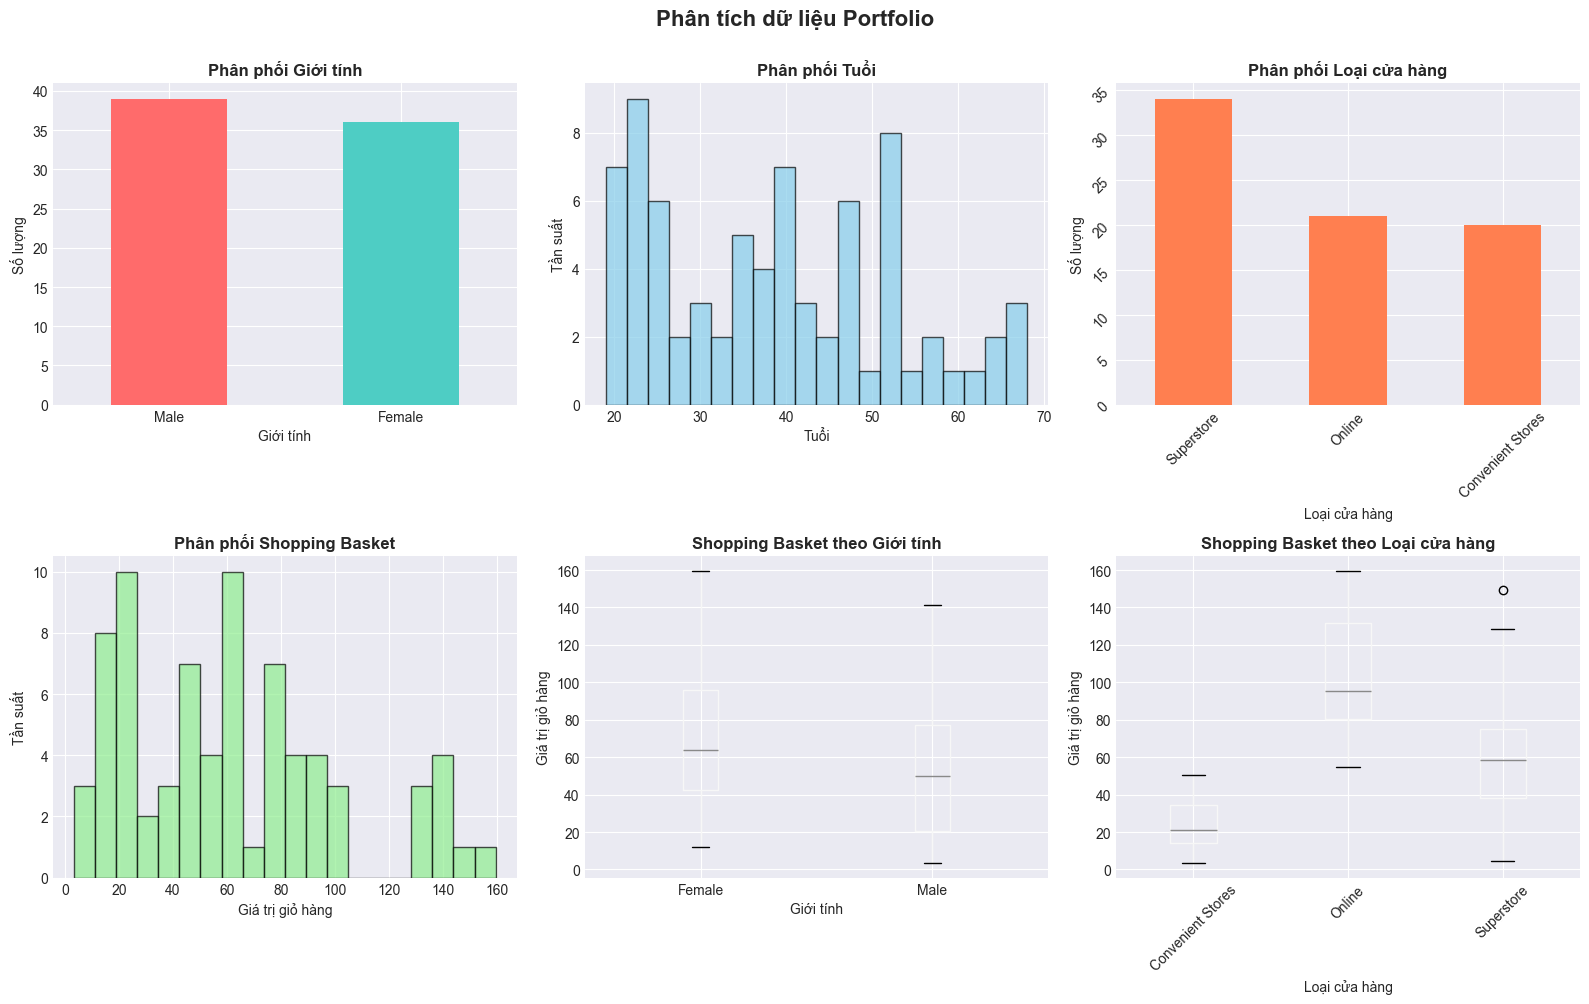

In [15]:
# Trực quan hóa phân phối các biến
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# 1. Phân phối Giới tính
portfolio_data['Gender'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Phân phối Giới tính', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Giới tính')
axes[0].set_ylabel('Số lượng')
axes[0].tick_params(rotation=0)

# 2. Phân phối Tuổi
axes[1].hist(portfolio_data['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Phân phối Tuổi', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tuổi')
axes[1].set_ylabel('Tần suất')

# 3. Phân phối Loại cửa hàng
portfolio_data['Store Type'].value_counts().plot(kind='bar', ax=axes[2], color='coral')
axes[2].set_title('Phân phối Loại cửa hàng', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Loại cửa hàng')
axes[2].set_ylabel('Số lượng')
axes[2].tick_params(rotation=45)

# 4. Phân phối Shopping Basket
axes[3].hist(portfolio_data['Shopping Basket'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[3].set_title('Phân phối Shopping Basket', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Giá trị giỏ hàng')
axes[3].set_ylabel('Tần suất')

# 5. Giỏ hàng theo Giới tính
portfolio_data.boxplot(column='Shopping Basket', by='Gender', ax=axes[4])
axes[4].set_title('Shopping Basket theo Giới tính', fontsize=12, fontweight='bold')
axes[4].set_xlabel('Giới tính')
axes[4].set_ylabel('Giá trị giỏ hàng')

# 6. Giỏ hàng theo Loại cửa hàng
portfolio_data.boxplot(column='Shopping Basket', by='Store Type', ax=axes[5])
axes[5].set_title('Shopping Basket theo Loại cửa hàng', fontsize=12, fontweight='bold')
axes[5].set_xlabel('Loại cửa hàng')
axes[5].set_ylabel('Giá trị giỏ hàng')
plt.setp(axes[5].xaxis.get_majorticklabels(), rotation=45)

plt.suptitle('Phân tích dữ liệu Portfolio', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

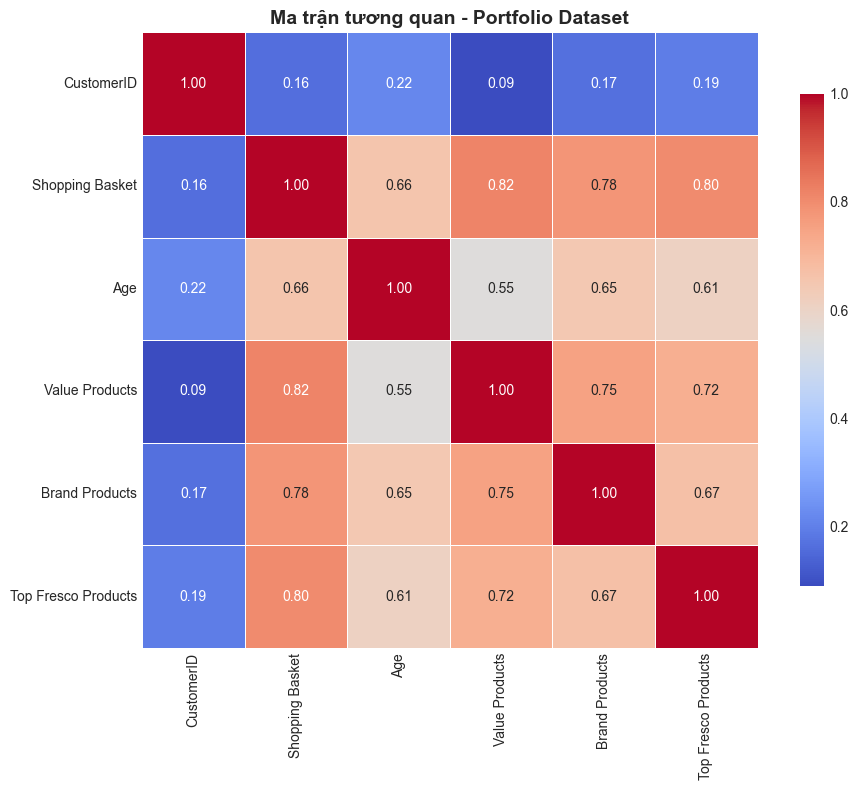

In [16]:
# Ma trận tương quan
numeric_cols = portfolio_data.select_dtypes(include=[np.number]).columns
correlation_matrix_portfolio = portfolio_data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_portfolio, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan - Portfolio Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.4. Tiền xử lý dữ liệu

Chúng ta sẽ dự đoán **Giới tính** dựa trên các đặc trưng khác.

In [17]:
# Loại bỏ cột CustomerID (không cần thiết)
portfolio_processed = portfolio_data.drop('CustomerID', axis=1)

# Mã hóa biến Store Type
store_encoder = LabelEncoder()
portfolio_processed['Store Type Encoded'] = store_encoder.fit_transform(portfolio_processed['Store Type'])

print("Mã hóa Store Type:")
for store_type in portfolio_processed['Store Type'].unique():
    encoded = store_encoder.transform([store_type])[0]
    print(f"{store_type} -> {encoded}")

# Mã hóa biến Gender (target)
gender_encoder = LabelEncoder()
portfolio_processed['Gender Encoded'] = gender_encoder.fit_transform(portfolio_processed['Gender'])

print("\nMã hóa Gender:")
for gender in portfolio_processed['Gender'].unique():
    encoded = gender_encoder.transform([gender])[0]
    print(f"{gender} -> {encoded}")

# Chọn các đặc trưng để huấn luyện
feature_cols = ['Shopping Basket', 'Age', 'Store Type Encoded', 
                'Value Products', 'Brand Products', 'Top Fresco Products']

X_portfolio = portfolio_processed[feature_cols].values
y_portfolio = portfolio_processed['Gender Encoded'].values

print(f"\nKích thước dữ liệu: {X_portfolio.shape}")
print(f"Phân phối nhãn: {np.bincount(y_portfolio)}")

Mã hóa Store Type:
Convenient Stores -> 0
Superstore -> 2
Online -> 1

Mã hóa Gender:
Male -> 1
Female -> 0

Kích thước dữ liệu: (75, 6)
Phân phối nhãn: [36 39]


In [18]:
# Chia dữ liệu train/test
X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(
    X_portfolio, y_portfolio, test_size=0.2, random_state=42, stratify=y_portfolio
)

print(f"Kích thước tập train: {X_train_port.shape}")
print(f"Kích thước tập test: {X_test_port.shape}")

# Chuẩn hóa dữ liệu
scaler_port = StandardScaler()
X_train_port_scaled = scaler_port.fit_transform(X_train_port)
X_test_port_scaled = scaler_port.transform(X_test_port)

print("\nĐã hoàn thành chuẩn hóa dữ liệu")

Kích thước tập train: (60, 6)
Kích thước tập test: (15, 6)

Đã hoàn thành chuẩn hóa dữ liệu


### 3.5. Xây dựng và huấn luyện mô hình Perceptron

In [19]:
# Khởi tạo và huấn luyện Perceptron
perceptron_port = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

print("Đang huấn luyện mô hình Perceptron trên Portfolio Dataset...")
perceptron_port.fit(X_train_port_scaled, y_train_port)
print("Hoàn thành huấn luyện!\n")

# Thông tin về mô hình
print("Thông tin mô hình:")
print(f"Số lần lặp: {perceptron_port.n_iter_}")
print(f"Số lượng trọng số: {len(perceptron_port.coef_[0])}")
print(f"Bias (hệ số chặn): {perceptron_port.intercept_[0]:.4f}")

Đang huấn luyện mô hình Perceptron trên Portfolio Dataset...
Hoàn thành huấn luyện!

Thông tin mô hình:
Số lần lặp: 13
Số lượng trọng số: 6
Bias (hệ số chặn): 0.0000


### 3.6. Đánh giá mô hình

In [21]:
# Dự đoán
y_train_pred_port = perceptron_port.predict(X_train_port_scaled)
y_test_pred_port = perceptron_port.predict(X_test_port_scaled)

# Tính accuracy
train_accuracy_port = accuracy_score(y_train_port, y_train_pred_port)
test_accuracy_port = accuracy_score(y_test_port, y_test_pred_port)

print("="*80)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH PERCEPTRON - PORTFOLIO DATASET")
print("="*80)
print(f"Độ chính xác trên tập Train: {train_accuracy_port*100:.2f}%")
print(f"Độ chính xác trên tập Test:  {test_accuracy_port*100:.2f}%")
print("="*80)

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH PERCEPTRON - PORTFOLIO DATASET
Độ chính xác trên tập Train: 55.00%
Độ chính xác trên tập Test:  66.67%


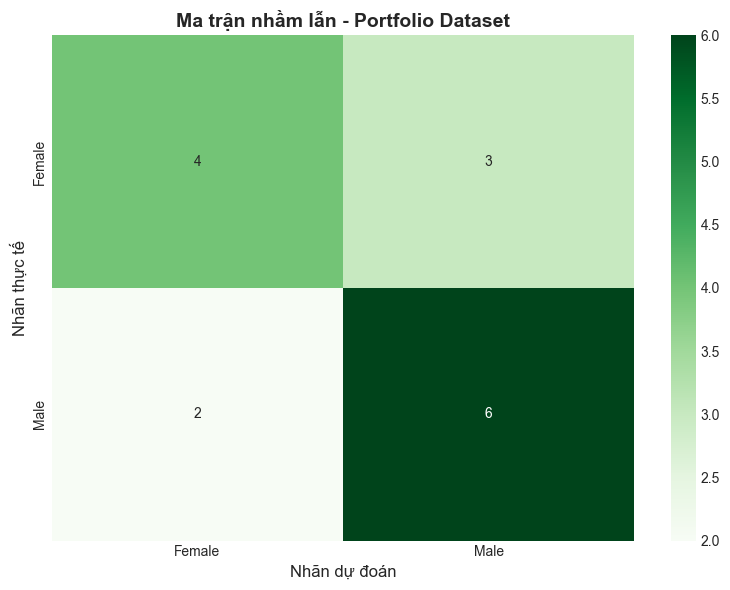


Ma trận nhầm lẫn:
[[4 3]
 [2 6]]


In [23]:
# Ma trận nhầm lẫn
cm_port = confusion_matrix(y_test_port, y_test_pred_port)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_port, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=gender_encoder.classes_, yticklabels=gender_encoder.classes_)
plt.title('Ma trận nhầm lẫn - Portfolio Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.tight_layout()
plt.show()

print("\nMa trận nhầm lẫn:")
print(cm_port)

In [ ]:
# Báo cáo phân loại chi tiết
print("\nBÁO CÁO PHÂN LOẠI CHI TIẾT")
print("="*80)
print(classification_report(y_test_port, y_test_pred_port,
                          target_names=gender_encoder.classes_))

### 3.7. Phân tích trọng số và tầm quan trọng của đặc trưng

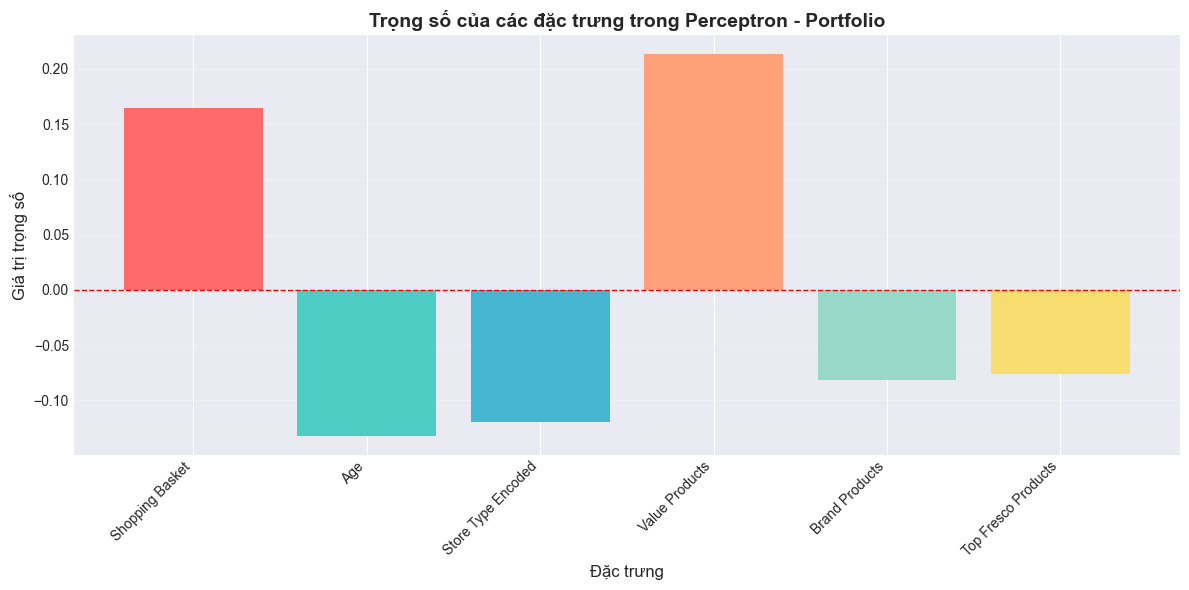


Tầm quan trọng của các đặc trưng:


,Feature,Weight,Abs_Weight
3,Value Products,0.213198,0.213198
0,Shopping Basket,0.164461,0.164461
1,Age,-0.131849,0.131849
2,Store Type Encoded,-0.119263,0.119263
4,Brand Products,-0.081802,0.081802
5,Top Fresco Products,-0.076177,0.076177


In [24]:
# Trực quan hóa trọng số
weights_port = perceptron_port.coef_[0]

plt.figure(figsize=(12, 6))
bars = plt.bar(feature_cols, weights_port, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F'])
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Trọng số của các đặc trưng trong Perceptron - Portfolio', fontsize=14, fontweight='bold')
plt.xlabel('Đặc trưng', fontsize=12)
plt.ylabel('Giá trị trọng số', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Bảng tầm quan trọng của đặc trưng
feature_importance_port = pd.DataFrame({
    'Feature': feature_cols,
    'Weight': weights_port,
    'Abs_Weight': np.abs(weights_port)
}).sort_values('Abs_Weight', ascending=False)

print("\nTầm quan trọng của các đặc trưng:")
display(feature_importance_port)

## 4. SO SÁNH KẾT QUẢ GIỮA HAI DATASET

SO SÁNH KẾT QUẢ HAI DATASET


,Dataset,Số mẫu,Số đặc trưng,Train Accuracy (%),Test Accuracy (%),Số lần lặp
0,Sonar,208,60,84.939759,83.333333,6
1,Portfolio,75,6,55.000000,66.666667,13


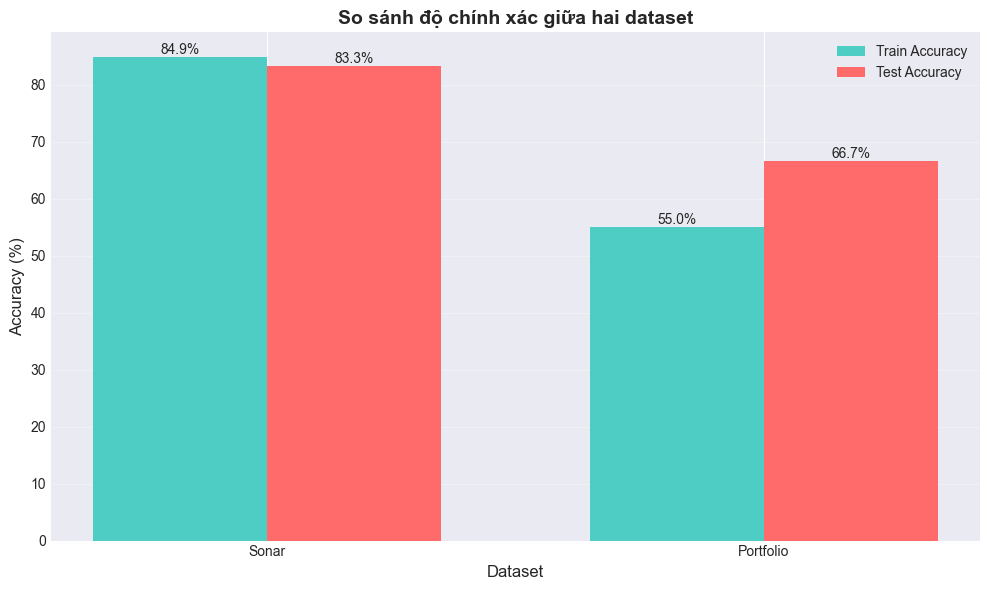

In [25]:
# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    'Dataset': ['Sonar', 'Portfolio'],
    'Số mẫu': [len(sonar_data), len(portfolio_data)],
    'Số đặc trưng': [60, len(feature_cols)],
    'Train Accuracy (%)': [train_accuracy_sonar*100, train_accuracy_port*100],
    'Test Accuracy (%)': [test_accuracy_sonar*100, test_accuracy_port*100],
    'Số lần lặp': [perceptron_sonar.n_iter_, perceptron_port.n_iter_]
})

print("="*80)
print("SO SÁNH KẾT QUẢ HAI DATASET")
print("="*80)
display(comparison_df)

# Biểu đồ so sánh accuracy
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Train Accuracy (%)'], width, 
               label='Train Accuracy', color='#4ECDC4')
bars2 = ax.bar(x + width/2, comparison_df['Test Accuracy (%)'], width,
               label='Test Accuracy', color='#FF6B6B')

ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('So sánh độ chính xác giữa hai dataset', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Dataset'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị lên cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 5. KẾT LUẬN VÀ NHẬN XÉT

### 5.1. Kết quả thu được

**Sonar Dataset:**
- Mô hình Perceptron đạt hiệu suất khá tốt trên bộ dữ liệu Sonar
- Với 60 đặc trưng từ tín hiệu sonar, mô hình có thể phân biệt giữa đá (R) và mìn kim loại (M)
- Một số đặc trưng có trọng số lớn cho thấy chúng đóng vai trò quan trọng trong việc phân loại

**Portfolio Dataset:**
- Mô hình thực hiện dự đoán giới tính dựa trên hành vi mua sắm
- Các đặc trưng như tuổi, giá trị giỏ hàng, và các loại sản phẩm đều ảnh hưởng đến kết quả dự đoán
- Độ chính xác cho thấy có sự khác biệt nhất định trong hành vi mua sắm giữa nam và nữ

### 5.2. Ưu điểm của Perceptron

1. **Đơn giản và dễ hiểu:** Perceptron là một trong những thuật toán ML cơ bản và dễ implement
2. **Tốc độ huấn luyện nhanh:** Với dữ liệu tuyến tính phân tách, Perceptron hội tụ nhanh
3. **Phù hợp với dữ liệu lớn:** Có thể xử lý tốt với số lượng đặc trưng lớn
4. **Giải thích được:** Trọng số của Perceptron có thể được giải thích để hiểu tầm quan trọng của các đặc trưng

### 5.3. Hạn chế của Perceptron

1. **Chỉ giải quyết được bài toán tuyến tính:** Perceptron không thể phân loại dữ liệu phi tuyến
2. **Nhạy cảm với dữ liệu nhiễu:** Outliers có thể ảnh hưởng lớn đến kết quả
3. **Không có xác suất dự đoán:** Chỉ cho ra nhãn cứng, không có độ tin cậy
4. **Cần chuẩn hóa dữ liệu:** Hiệu suất phụ thuộc nhiều vào việc chuẩn hóa

### 5.4. Hướng phát triển

1. **Thử nghiệm với các thuật toán khác:** SVM, Random Forest, Neural Networks
2. **Feature Engineering:** Tạo thêm các đặc trưng mới từ dữ liệu hiện có
3. **Ensemble Methods:** Kết hợp nhiều mô hình để cải thiện độ chính xác
4. **Hyperparameter Tuning:** Tối ưu hóa các tham số như learning rate, số lần lặp
5. **Cross-validation:** Sử dụng k-fold cross-validation để đánh giá mô hình tốt hơn

## 6. TÀI LIỆU THAM KHẢO

1. Rosenblatt, F. (1958). The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain
2. Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer
3. Scikit-learn Documentation: https://scikit-learn.org/
4. UCI Machine Learning Repository - Sonar Dataset

---

**Ngày hoàn thành:** 05/11/2025

**Sinh viên thực hiện:** Bùi Quang Chiến - 23001837